In [ ]:
!wget http://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2024-03-26 06:41:09--  http://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv [following]
--2024-03-26 06:41:10--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2024-03-26 06:41:10 (19.4 MB/s) - ‘iris.csv’ saved [3716/3716]



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris = pd.read_csv("iris.csv")
print(iris.shape)

(150, 5)


In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [7]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

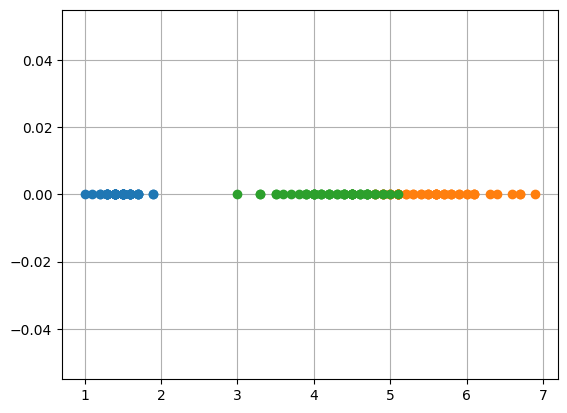

In [8]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"]
iris_versicolor = iris.loc[iris["species"] == "versicolor"]
plt.plot(iris_setosa["petal_length"],np.zeros_like(iris_setosa["petal_length"]),'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica["petal_length"]),'o')
plt.plot(iris_versicolor["petal_length"],np.zeros_like(iris_versicolor["petal_length"]),'o')
plt.grid()
plt.show()

###Observation() | Conclusion

* Green points are Virginica, orange points are Versicolor and blue points are Setosa
* Virginica and Versicolor are overlapping
* 1D Scatter are very hard to read and understand

### 2D SCATTER PLOT

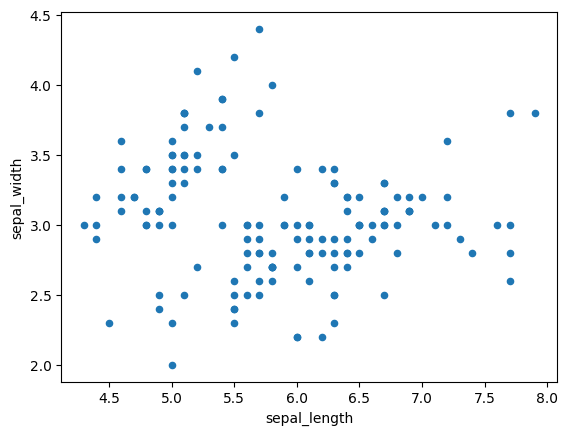

In [9]:
iris.plot(kind = "scatter", x = "sepal_length", y = "sepal_width")
plt.show()

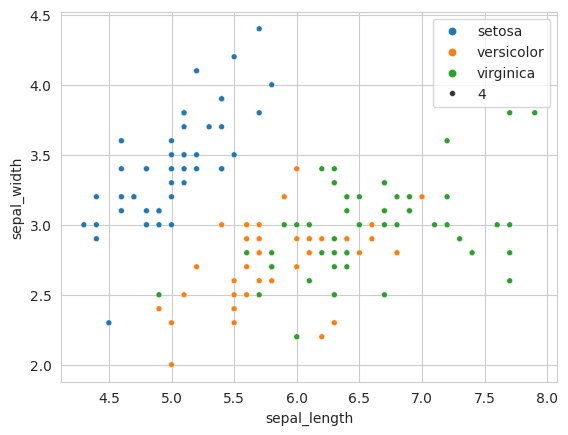

In [10]:
sns.set_style("whitegrid");
sns.scatterplot(iris, x = "sepal_length", y = "sepal_width", hue = "species", size = 4)
plt.legend()
plt.show()

### Observation(s) | Conclusion

Blue points can be easily separated from red and green by drawing a line.
But red and green data points cannot be easily separated.
Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
Separating Versicolor from Viginica is much harder as they have considerable overlap.

### 3D SCATTER PLOT

In [11]:
import plotly.express as px
fig = px.scatter_3d(iris, x = "sepal_length", y = "sepal_width", z = "petal_width", color = "species")
fig.show()

Here we are using plotly library for plotting as you can see we have used sepal length on the x-axis, sepal width on the y-axis and petal length on the z-axis.

A 3D plot will be used for three variables or dimensions. However, what would do if we have more than 3 dimensions or features in our dataset as we humans do have the capability to visualize more than 3 dimensions? One solution to this problem is pair plots.

### PAIR PLOTS

A pairs plot allows us to see both distribution of single variables and relationships between two variables.

For example, let's say we have four features 'sepal length', 'sepal width', 'petal length' and 'petal width' in our iris dataset. In that case, we will have 4C2 plots i.e. 6 unique plots.

The pairs in this case will be :

*   sepal length, sepal width
*   sepal length, petal length
*   sepal length, petal width
*   sepal width, petal length
*   sepal width, petal width
*   petal length, petal width

So, here instead of trying to visualize four dimensions which is not possible. We will look into 6 2D plots and try to understand the 4-dimensional data in the form of a matrix.

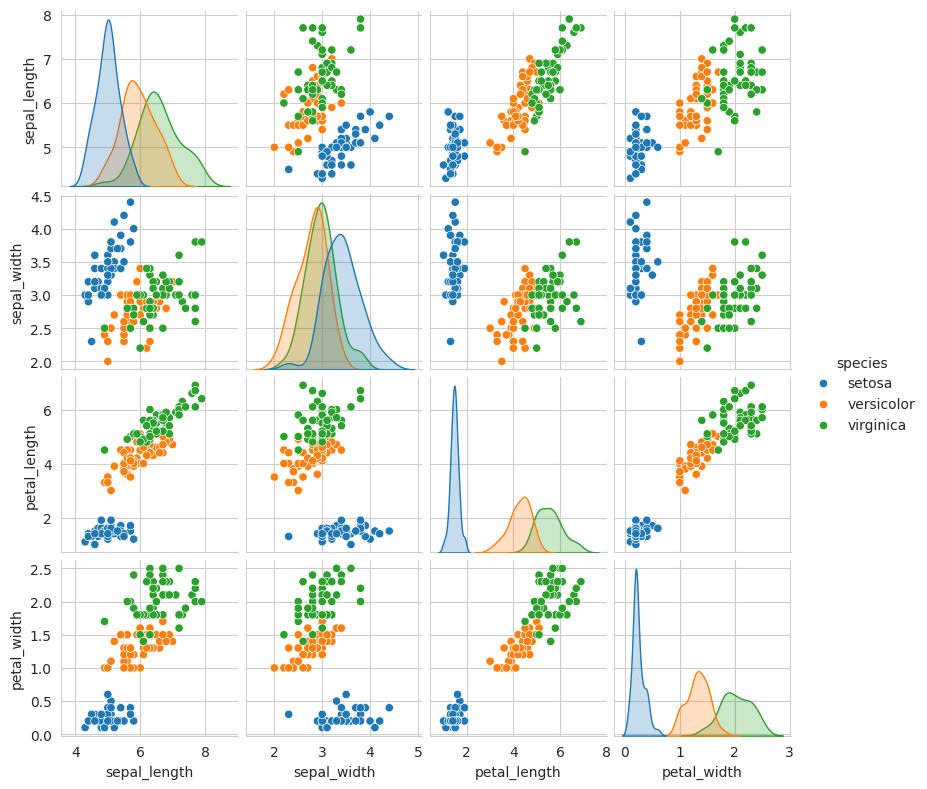

In [12]:
sns.set_style("whitegrid");
sns.pairplot(iris, hue = "species", height = 2);
plt.show()

As Seen Above, The Pair Plots Can Be Divided Into Three Parts:

The diagonal plot which showcases the histogram. The histogram allows us to see the PDF/Probability distribution of a single variable
Upper triangle and lower triangle which shows us the scatter plot.
The scatter plots show us the relationship between the features. These upper and lower triangles are the mirror image of each other.

Pair plot will only plot the variables which are numerical.variables which are of String type, by default pair plot won’t plot automatically.If you want to plot, then you need to encode it as numerical. However, Seaborn will encode internally and assign a label to each unique value in the non-numerical values.

### Limitation of Pair plot

If you have d features, you will have a pair plot of size dxd cells where each cell is a plot between a pair of features.So, pair plots are hard to use when we have high dimensional data. For high dimensional data we can use PCA, t-SNE.

### Observation(s) | Conclusion

petal length and petal width are the most useful features to identify various flower types.
While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).
We can find “lines” and “if-else” conditions to build a simple model to classify the flower types.

### HISTOGRAM

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).To construct a histogram, the first step is to bin the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.

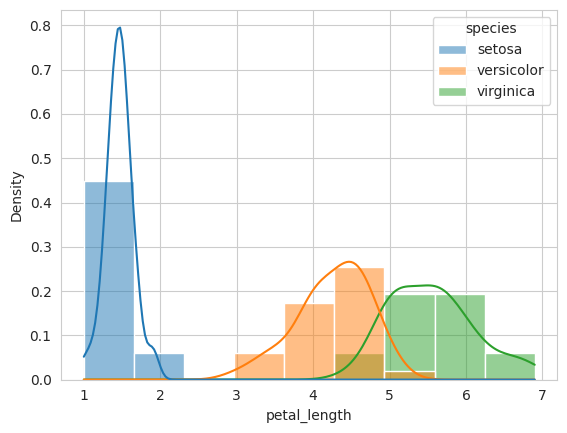

In [ ]:
sns.histplot(iris, x = "petal_length", hue = "species", kde = True, stat = "density")
plt.show()

[]

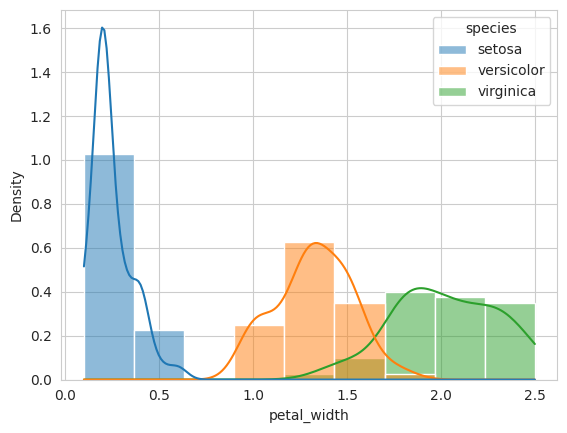

In [ ]:
sns.histplot(iris, x = "petal_width", hue = "species", kde = True, stat = "density")
plt.plot()

### Observation(s) | Conclusion

*   As we compare petal length and petal width then petal length the setosa are better separable than using patel width

*   There is overlap between versicolor and virginica

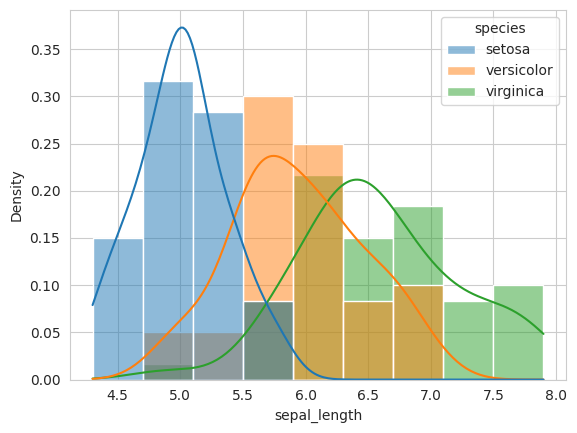

In [ ]:
sns.histplot(iris, x = "sepal_length", hue = "species", kde = True, stat = "density")
plt.show()

### Observation(s) | Conclusion


*   Here we can't separate any class because all of them are overlapped

*   From above observations we can say that Sapel length is worst than Patel length and Patel width.

<Axes: xlabel='sepal_width', ylabel='Density'>

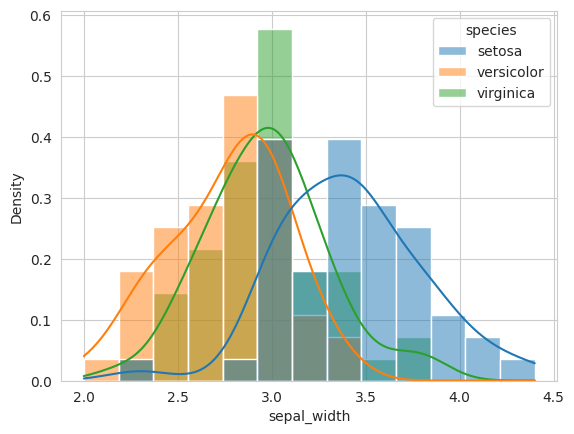

In [ ]:
sns.histplot(iris, x = "sepal_width", hue = "species", kde = True, stat = "density")

### Observation(s) | Conclusion

*   And as we can see virginica and versicolor are fully overlapped.

### Data Insights:

*   The pdf curve of Iris Setosa ends roughly at 2.1

*   If petal length < 2.1, then species is Iris Setosa

*   The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8

*   If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor

*   If petal length > 4.8 then species is Iris Virginica


### Calculating PDF Points

In [ ]:
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins=10, density = True)

In [ ]:
counts[1]/ sum(counts)

0.02000000000000003

Printing the counts for histogram:
 [0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
Sum of count is:
 11.11111111111111
Printing the edges of bins:
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
PDF is as follows:
 [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


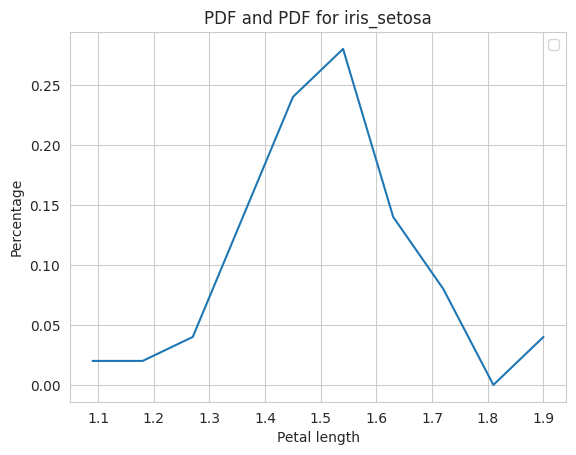

In [ ]:
print("Printing the counts for histogram:\n", counts)
pdf = counts/ (sum(counts))
print("Sum of count is:\n", sum(counts))
print("Printing the edges of bins:\n",bin_edges)
print("PDF is as follows:\n", pdf);
plt.gca().legend(("PDF"))
plt.title("PDF and PDF for iris_setosa")
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],pdf)

### Calculating CDF Points

CDF is as follows:
 [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


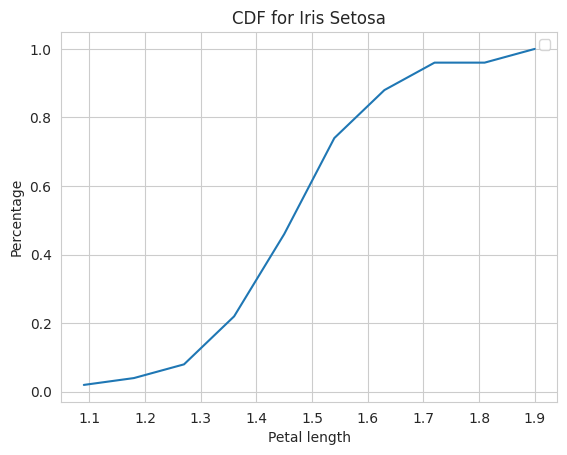

In [ ]:
cdf = np.cumsum(pdf)
print("CDF is as follows:\n",cdf)
plt.gca().legend(("CDF"))
plt.title("CDF for Iris Setosa")
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],cdf)

In [ ]:
cdf

array([0.02, 0.04, 0.08, 0.22, 0.46, 0.74, 0.88, 0.96, 0.96, 1.  ])

[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


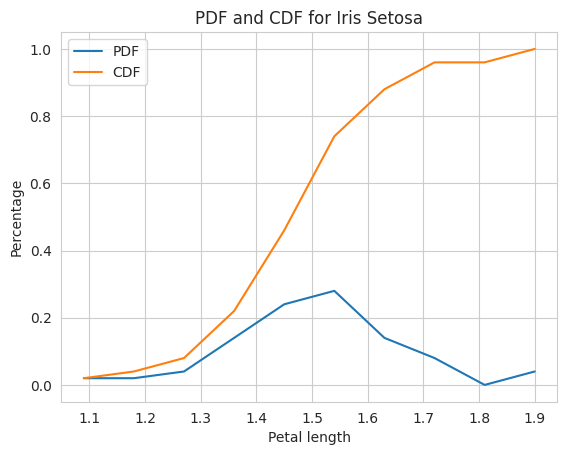

In [ ]:
counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins = 10, density = True)
print(counts)
pdf = counts/ (sum(counts))
print(pdf);
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(("PDF", "CDF"))
plt.title("PDF and CDF for Iris Setosa")
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();



*   25% of point typically have their petal length between 1.5 and 1.6 called PDF

*   There are 82% of setosa flower that have their petal length is less than 1.6(PL ≤ 1.6)

*   There are 20% of setosa flower have their petal length is less than 1.3




[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


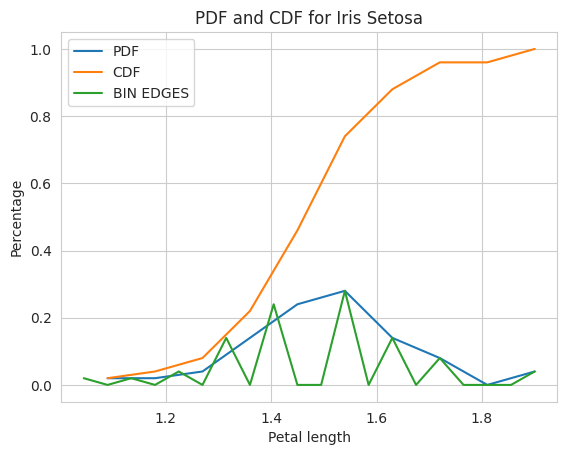

In [ ]:
counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins = 10, density = True)
pdf = counts/ (sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(iris_setosa["petal_length"], bins = 20, density = True)

pdf = counts/ (sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.gca().legend(("PDF", "CDF", "BIN EDGES"))
plt.title("PDF and CDF for Iris Setosa")
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();


### PDF and CDF for Virginica

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


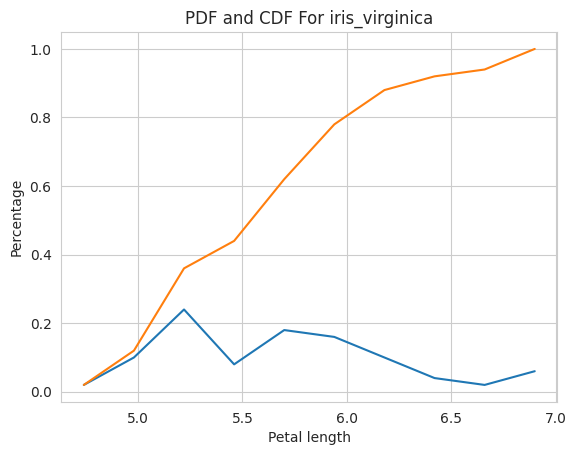

In [ ]:
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For iris_virginica')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show();

### PDF and CDF for Versicolor

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


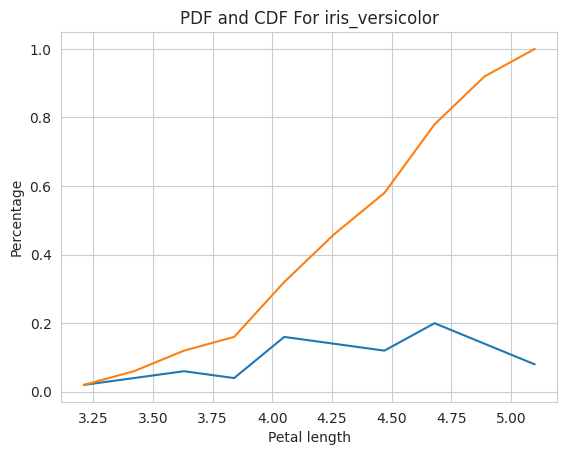

In [ ]:
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For iris_versicolor')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.show();

### PDF and CDF for all Species

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


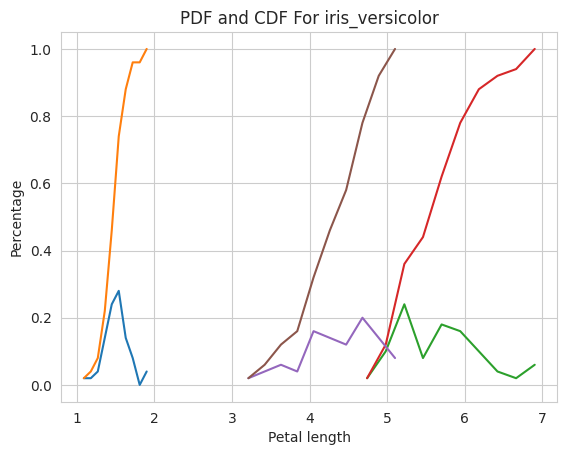

In [ ]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF For iris_versicolor')
plt.xlabel("Petal length")
plt.ylabel("Percentage")

plt.show();

### Mean, Variance, Std-deviation

In [ ]:
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStandard Deviation:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Means:
1.464
2.4156862745098038
5.5520000000000005
4.26

Standard Deviation:
0.17176728442867112
0.546347874526844
0.4651881339845203


### Median, Quantiles, Percentites, IQR.

In [ ]:
a=np.arange(0, 101)
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
np.percentile(a, 99)

99.0

In [ ]:
np.percentile(iris_setosa["petal_length"],25)

1.4

In [ ]:
np.median(iris_setosa["petal_length"])

1.5

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation:")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation:
0.14826022185056031
0.6671709983275211
0.5189107764769602


### Quantiles:

Any set of data, arranged in ascending or descending order, can be divided into various parts, also known as partitions or subsets, regulated by quantiles. Quantile is a generic term for those values that divide the set into partitions of size n, so that each part represents 1/n of the set.

x={5,6,9,11,13,20,26}


*   first quartile, or Q1 = 6
*   second quartile, or Q2 = 11
*   third quartile, or Q3 = 20









### Box-plot and whisker

A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. It does not show a distribution in as much detail as a stem and leaf plot or histogram does, but is especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set.

Box-plot with whiskers: another method of visualising the 1-D scatter plot more intuitive

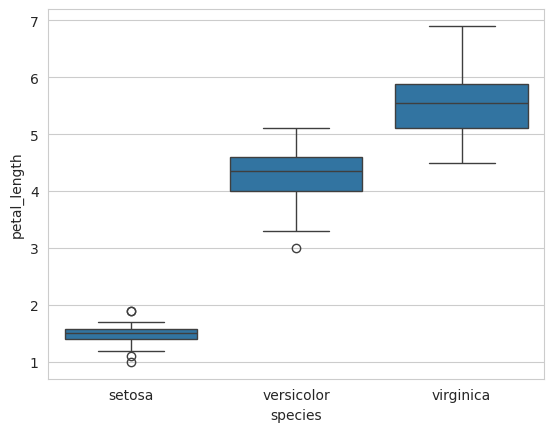

In [ ]:
sns.boxplot(x="species",y="petal_length", data= iris)
plt.show()

<ipython-input-50-63db8dd8aa0b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(method='pearson'))


<Axes: >

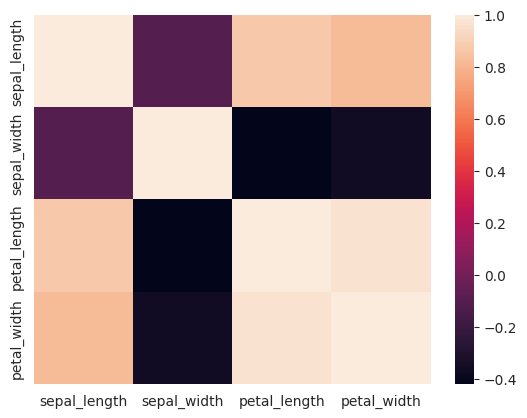

In [ ]:
sns.heatmap(iris.corr(method='pearson'))